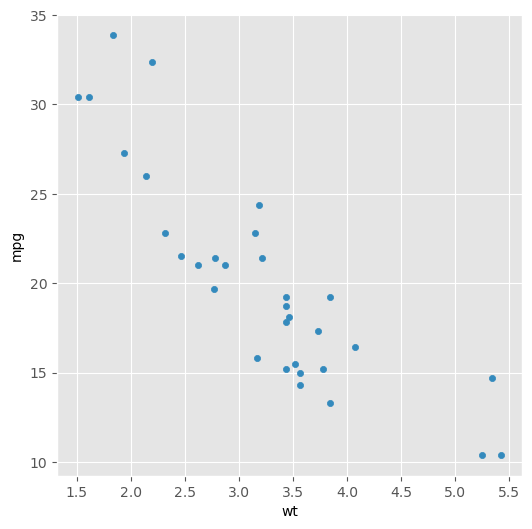

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
matplotlib.style.use('ggplot')

mtcars = pd.read_csv("D:\Study\DS\mtcars.csv")

mtcars.plot(kind='scatter',x='wt',y='mpg',figsize=(6,6));

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing 
import sklearn.cross_decomposition as cv
from sklearn import linear_model
import sklearn

In [9]:
dataset = sklearn.datasets.fetch_california_housing()
X = dataset['data']
y = dataset['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [12]:
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [19]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
train_score_ls=lasso.score(X_train,y_train)
test_score_ls=lasso.score(X_test,y_test)

print("The train score {}".format(train_score_ls))
print("The test score {}".format(test_score_ls))

The train score 0.5469386689745058
The test score 0.5338136479978026


In [32]:
lasso = Lasso(alpha=0.005)
lasso.fit(X_train,y_train)
train_score_ls=lasso.score(X_train,y_train)
test_score_ls=lasso.score(X_test,y_test)

print("The train score {}".format(train_score_ls))
print("The test score {}".format(test_score_ls))

The train score 0.6054910960164069
The test score 0.6022155280141153


In [34]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
train_score_rg=ridge.score(X_train,y_train)
test_score_rg=ridge.score(X_test,y_test)

print("The train score {}".format(train_score_rg))
print("The test score {}".format(test_score_rg))

The train score 0.6064211680814635
The test score 0.6050586450735599


In [40]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas = [0.0001,0.001,0.1,1,10],random_state=0).fit(X_train,y_train)

print(lasso_cv.score(X_train,y_train))
print(lasso_cv.score(X_test,y_test))

0.606383972592905
0.604626197272006


In [42]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas = [0.0001,0.001,0.1,1,10]).fit(X_train,y_train)

print(ridge_cv.score(X_train,y_train))
print(ridge_cv.score(X_test,y_test))

0.6064172976629851
0.6049277248626737


In [37]:
linear = LinearRegression()
linear.fit(X_train,y_train)
train_score_linear=linear.score(X_train,y_train)
test_score_linear=linear.score(X_test,y_test)

print("The train score {}".format(train_score_linear))
print("The test score {}".format(test_score_linear))

The train score 0.6064211684828189
The test score 0.6050599538822241


In [44]:
alphas = np.logspace(-4,-1,10)

scores=np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso=linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    scores[i]=lasso.score(X_test,y_test)
    print(a)

0.0001
0.00021544346900318845
0.00046415888336127773
0.001
0.002154434690031882
0.004641588833612777
0.01
0.021544346900318822
0.046415888336127774
0.1


CV [ 3.81485543e-01  1.12872676e-02  2.20440782e-03  0.00000000e+00
  1.88778147e-06 -3.51349405e-03 -3.39002345e-01 -3.39456784e-01]


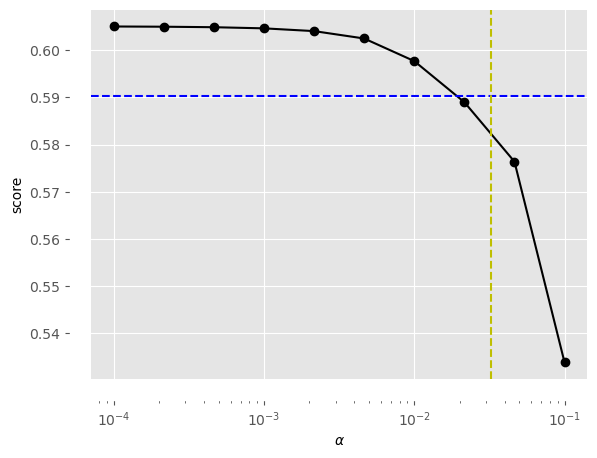

In [52]:
lassocv = linear_model.LassoCV()
lassocv.fit(X,y)
lassocv_score = lassocv.score(X,y)
lassocv_alpha = lassocv.alpha_
print('CV',lassocv.coef_)

plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score,color='b',ls='--')
plt.axvline(lassocv_alpha,color='y',ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('score')
plt.xscale('log')
sns.despine(offset=15)

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3,1,num=30)
model = make_pipeline(StandardScaler(),RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model,
    X_train,
    y_train,
    return_estimator=True,
    n_jobs=2
)
score = cv_results['test_score']
print (f" R2 score: {score.mean():.3f} ± {score.std():.3f}")

 R2 score: 0.603 ± 0.023


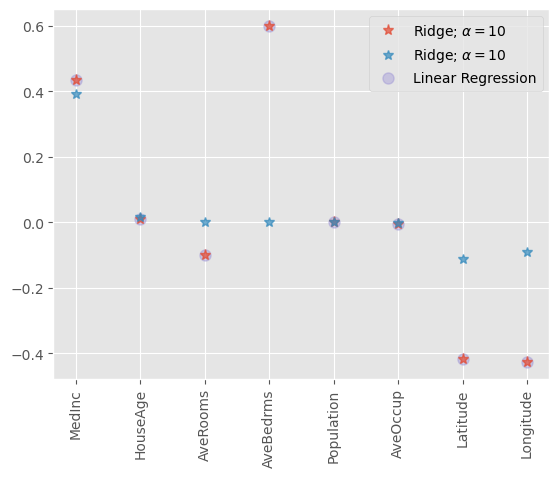

In [81]:
plt.figure()
plt.plot(dataset.feature_names,ridge.coef_,alpha=0.7,markersize=8,linestyle='none',marker="*",label=r'Ridge; $\alpha =10$',zorder=7)
plt.plot(dataset.feature_names,lasso.coef_,alpha=0.7,linestyle='none',markersize=7,marker="*",label=r'Ridge; $\alpha =10$',zorder=7)

plt.plot(dataset.feature_names,linear.coef_,alpha=0.4,linestyle='none',markersize=8,marker="o",label='Linear Regression')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [65]:
ridge.coef_

array([ 4.33768993e-01,  9.86033567e-03, -1.00428559e-01,  5.99491555e-01,
       -2.74360498e-06, -3.31738243e-03, -4.16477602e-01, -4.25952707e-01])

In [82]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
enet_model = ElasticNet().fit(X_train,y_train)

In [83]:
enet_model.coef_

array([ 2.54025141e-01,  1.17293329e-02,  0.00000000e+00, -0.00000000e+00,
        1.07104254e-05, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [84]:
enet_model.intercept_

0.7306713874373953

In [85]:
enet_model.predict(X_train)[:10]

array([2.59412451, 2.50317788, 1.88533748, 2.1883744 , 1.69654747,
       2.05883444, 2.5140281 , 2.07442705, 1.38205415, 2.24257197])

In [86]:
enet_model.predict(X_test)[:10]

array([2.1040646 , 1.64497978, 1.84635357, 2.58918483, 1.51226167,
       1.91741146, 2.11052391, 1.61976716, 1.87623127, 1.93822037])

In [88]:
y_pred = enet_model.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,y_pred))
mse

0.8800700853930081

In [89]:
r2_score(y_test,y_pred)

0.4177298795134846

In [90]:
y_pred_0 = lasso.predict(X_test)
print(r2_score(y_test,y_pred_0))

y_pred_1 = ridge.predict(X_test)
print(r2_score(y_test,y_pred_1))

y_pred_2 = enet_model.predict(X_test)
print(r2_score(y_test,y_pred_2))

0.5338136479978026
0.6050586450735599
0.4177298795134846


In [93]:
from sklearn.linear_model import ElasticNetCV

enet_cv_model = ElasticNetCV(cv=10).fit(X_train,y_train)

enet_cv_model.alpha_

0.06543225674803063

In [94]:
enet_cv_model.intercept_

-24.24052419530586

In [95]:
enet_cv_model.coef_

array([ 3.83539961e-01,  1.23938746e-02,  1.30177638e-03,  0.00000000e+00,
        5.73813656e-06, -3.15809526e-03, -2.99298208e-01, -2.93775977e-01])

In [99]:
enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train,y_train)

y_pred_1 = enet_tuned.predict(X_test)
r2_score(y_test,y_pred_1)
# np.sqrt(mean_squared_error(y_test,y_pred_1))

0.5785728156930974

In [100]:
y_pred_0 = lasso.predict(X_test)
print(r2_score(y_test,y_pred_0))

y_pred_1 = ridge.predict(X_test)
print(r2_score(y_test,y_pred_1))

y_pred_2 = enet_model.predict(X_test)
print(r2_score(y_test,y_pred_2))

y_pred_3 = enet_tuned.predict(X_test)
print(r2_score(y_test,y_pred_2))

0.5338136479978026
0.6050586450735599
0.4177298795134846
0.4177298795134846


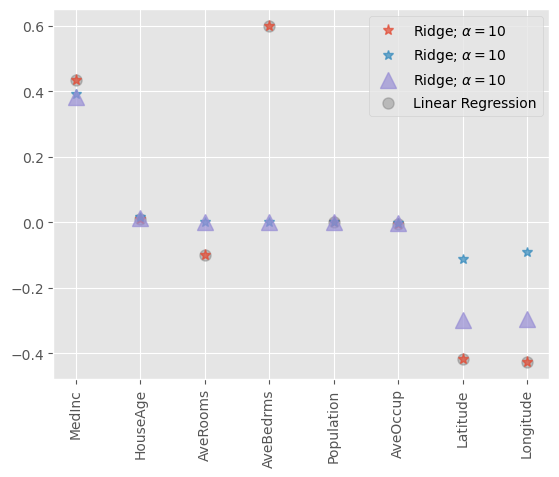

In [105]:
plt.figure()
plt.plot(dataset.feature_names,ridge.coef_,alpha=0.7,markersize=8,linestyle='none',marker="*",label=r'Ridge; $\alpha =10$',zorder=7)
plt.plot(dataset.feature_names,lasso.coef_,alpha=0.7,linestyle='none',markersize=7,marker="*",label=r'Ridge; $\alpha =10$',zorder=7)
plt.plot(dataset.feature_names,enet_tuned.coef_,alpha=0.7,linestyle='none',markersize=12,marker="^",label=r'Ridge; $\alpha =10$',zorder=7)
plt.plot(dataset.feature_names,linear.coef_,alpha=0.4,linestyle='none',markersize=8,marker="o",label='Linear Regression')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [106]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [178]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 
  
# metadata 
# print(breast_cancer.metadata) 
  
# variable information 
# print(breast_cancer.variables) 

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [180]:
X.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

In [190]:
X = X.fillna(method='bfill')

In [186]:
X.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64

In [187]:
X

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [188]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
train_score_ls=lasso.score(X_train,y_train)
test_score_ls=lasso.score(X_test,y_test)

print("The train score {}".format(train_score_ls))
print("The test score {}".format(test_score_ls))

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [189]:
lasso = Lasso(alpha=0.005)
lasso.fit(X_train,y_train)
train_score_ls=lasso.score(X_train,y_train)
test_score_ls=lasso.score(X_test,y_test)

print("The train score {}".format(train_score_ls))
print("The test score {}".format(test_score_ls))

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [164]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
train_score_rg=ridge.score(X_train,y_train)
test_score_rg=ridge.score(X_test,y_test)

print("The train score {}".format(train_score_rg))
print("The test score {}".format(test_score_rg))

The train score 0.8229377555979396
The test score 0.8476266790511421


In [166]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas = [0.0001,0.001,0.1,1,10],random_state=0).fit(X_train,y_train)

print(lasso_cv.score(X_train,y_train))
print(lasso_cv.score(X_test,y_test))

0.819791945854051
0.8461176242176063


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [167]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas = [0.0001,0.001,0.1,1,10]).fit(X_train,y_train)

print(ridge_cv.score(X_train,y_train))
print(ridge_cv.score(X_test,y_test))

linear = LinearRegression()
linear.fit(X_train,y_train)
train_score_linear=linear.score(X_train,y_train)
test_score_linear=linear.score(X_test,y_test)

print("The train score {}".format(train_score_linear))
print("The test score {}".format(test_score_linear))

0.8229373607493464
0.8475794376074772
The train score 0.8229377556379545
The test score 0.8476271546087323


In [169]:
alphas = np.logspace(-4,-1,10)

scores=np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso=linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    scores[i]=lasso.score(X_test,y_test)
    print(a)

lassocv = linear_model.LassoCV()
lassocv.fit(X,y)
lassocv_score = lassocv.score(X,y)
lassocv_alpha = lassocv.alpha_
print('CV',lassocv.coef_)

0.0001
0.00021544346900318845
0.00046415888336127773
0.001
0.002154434690031882
0.004641588833612777
0.01
0.021544346900318822
0.046415888336127774
0.1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV [0.06594018 0.05057193 0.0331078  0.01453202 0.00928824 0.08461247
 0.03941142 0.03320086 0.        ]


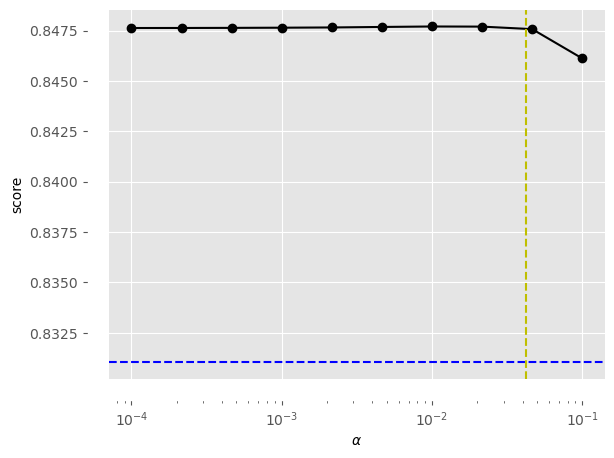

In [170]:
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score,color='b',ls='--')
plt.axvline(lassocv_alpha,color='y',ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('score')
plt.xscale('log')
sns.despine(offset=15)

In [171]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3,1,num=30)
model = make_pipeline(StandardScaler(),RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model,
    X_train,
    y_train,
    return_estimator=True,
    n_jobs=2
)
score = cv_results['test_score']
print (f" R2 score: {score.mean():.3f} ± {score.std():.3f}")

 R2 score: 0.809 ± 0.019


ValueError: x and y must have same first dimension, but have shapes (8,) and (1, 9)

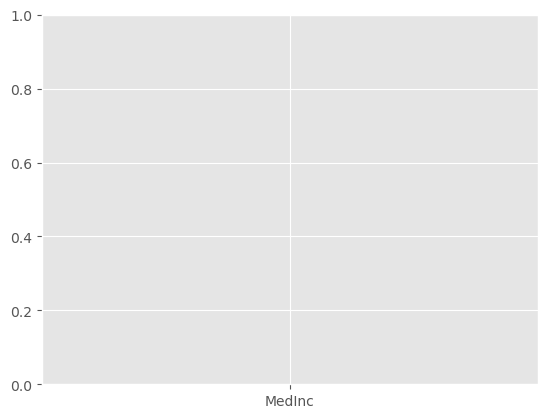

In [172]:
plt.figure()
plt.plot(dataset.feature_names,ridge.coef_,alpha=0.7,markersize=8,linestyle='none',marker="*",label=r'Ridge; $\alpha =10$',zorder=7)
plt.plot(dataset.feature_names,lasso.coef_,alpha=0.7,linestyle='none',markersize=7,marker="*",label=r'Ridge; $\alpha =10$',zorder=7)

plt.plot(dataset.feature_names,linear.coef_,alpha=0.4,linestyle='none',markersize=8,marker="o",label='Linear Regression')
plt.xticks(rotation=90)
plt.legend()
plt.show()

ridge.coef_


In [173]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
enet_model = ElasticNet().fit(X_train,y_train)

enet_model.coef_

enet_model.intercept_

enet_model.predict(X_train)[:10]

enet_model.predict(X_test)[:10]



y_pred = enet_model.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,y_pred))
mse

0.44038871305903043

In [174]:
r2_score(y_test,y_pred)

y_pred_0 = lasso.predict(X_test)
print(r2_score(y_test,y_pred_0))

y_pred_1 = ridge.predict(X_test)
print(r2_score(y_test,y_pred_1))

y_pred_2 = enet_model.predict(X_test)
print(r2_score(y_test,y_pred_2))


0.8461176242176063
0.8476266790511421
0.796982484129331


In [175]:
from sklearn.linear_model import ElasticNetCV

enet_cv_model = ElasticNetCV(cv=10).fit(X_train,y_train)

enet_cv_model.alpha_

enet_cv_model.intercept_

enet_cv_model.coef_

enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train,y_train)

y_pred_1 = enet_tuned.predict(X_test)
r2_score(y_test,y_pred_1)
# np.sqrt(mean_squared_error(y_test,y_pred_1))

y_pred_0 = lasso.predict(X_test)
print(r2_score(y_test,y_pred_0))

y_pred_1 = ridge.predict(X_test)
print(r2_score(y_test,y_pred_1))

y_pred_2 = enet_model.predict(X_test)
print(r2_score(y_test,y_pred_2))

y_pred_3 = enet_tuned.predict(X_test)
print(r2_score(y_test,y_pred_2))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8461176242176063
0.8476266790511421
0.796982484129331
0.796982484129331


ValueError: x and y must have same first dimension, but have shapes (8,) and (1, 9)

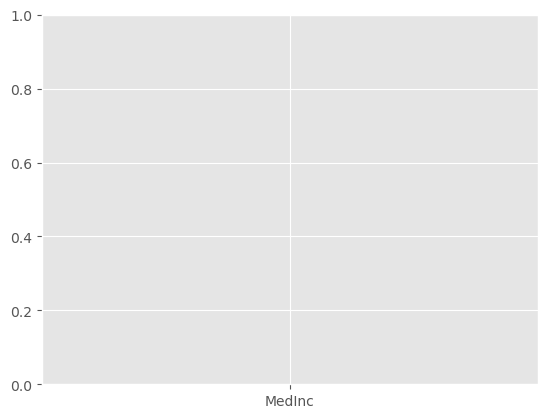

In [176]:
plt.figure()
plt.plot(dataset.feature_names,ridge.coef_,alpha=0.7,markersize=8,linestyle='none',marker="*",label=r'Ridge; $\alpha =10$',zorder=7)
plt.plot(dataset.feature_names,lasso.coef_,alpha=0.7,linestyle='none',markersize=7,marker="*",label=r'Ridge; $\alpha =10$',zorder=7)
plt.plot(dataset.feature_names,enet_tuned.coef_,alpha=0.7,linestyle='none',markersize=12,marker="^",label=r'Ridge; $\alpha =10$',zorder=7)
plt.plot(dataset.feature_names,linear.coef_,alpha=0.4,linestyle='none',markersize=8,marker="o",label='Linear Regression')
plt.xticks(rotation=90)
plt.legend()
plt.show()